# **Project \#2: YOLOv4**

Objectives:
* Practice applying YOLOv4 to your own data. 

If any questions, please contact the TAs via email:
* Yu-Lin Lu: sinicayllu@iis.sinica.edu.tw
* Hung-Shuo Chang: jonathanc@iis.sinica.edu.tw

This notebook:

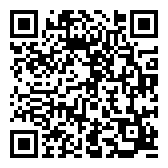

## **Introduction**

YOLO is a series of real-time object detection method.

YOLOv4 ([paper](https://arxiv.org/pdf/2004.10934.pdf)):
1. Anchor Based
2. CSPDarknet53
3. PANet + SPP
4. Data Augmentation:
  * Mosaic
  * CutMix

**Bag of freebies (helps during training and without increasing inference time):**
* Data augmentation

**Bag of specials (changes the architecture and increases the inference time by a little bit):**
* CSP block with mish activation
* SPP


### **CSPDarknet53**

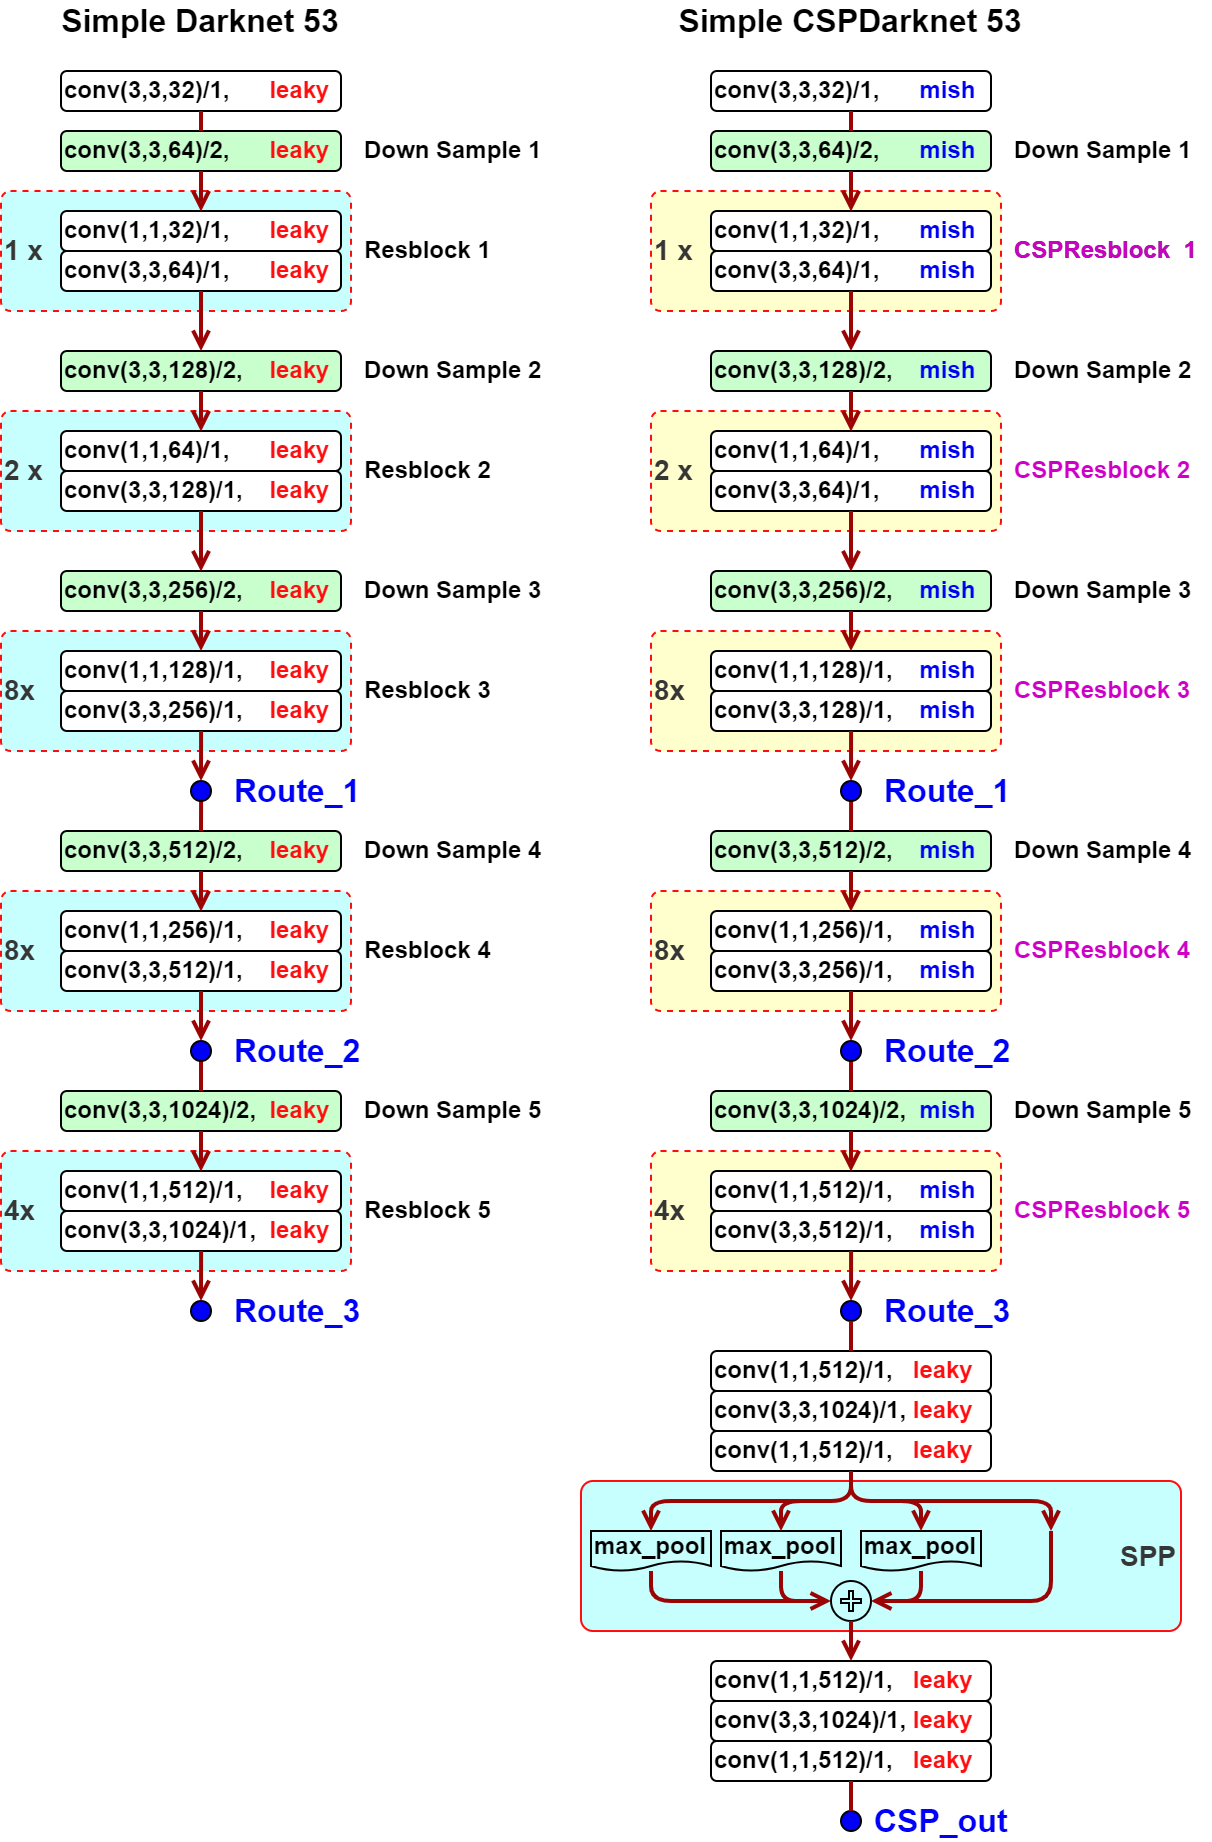

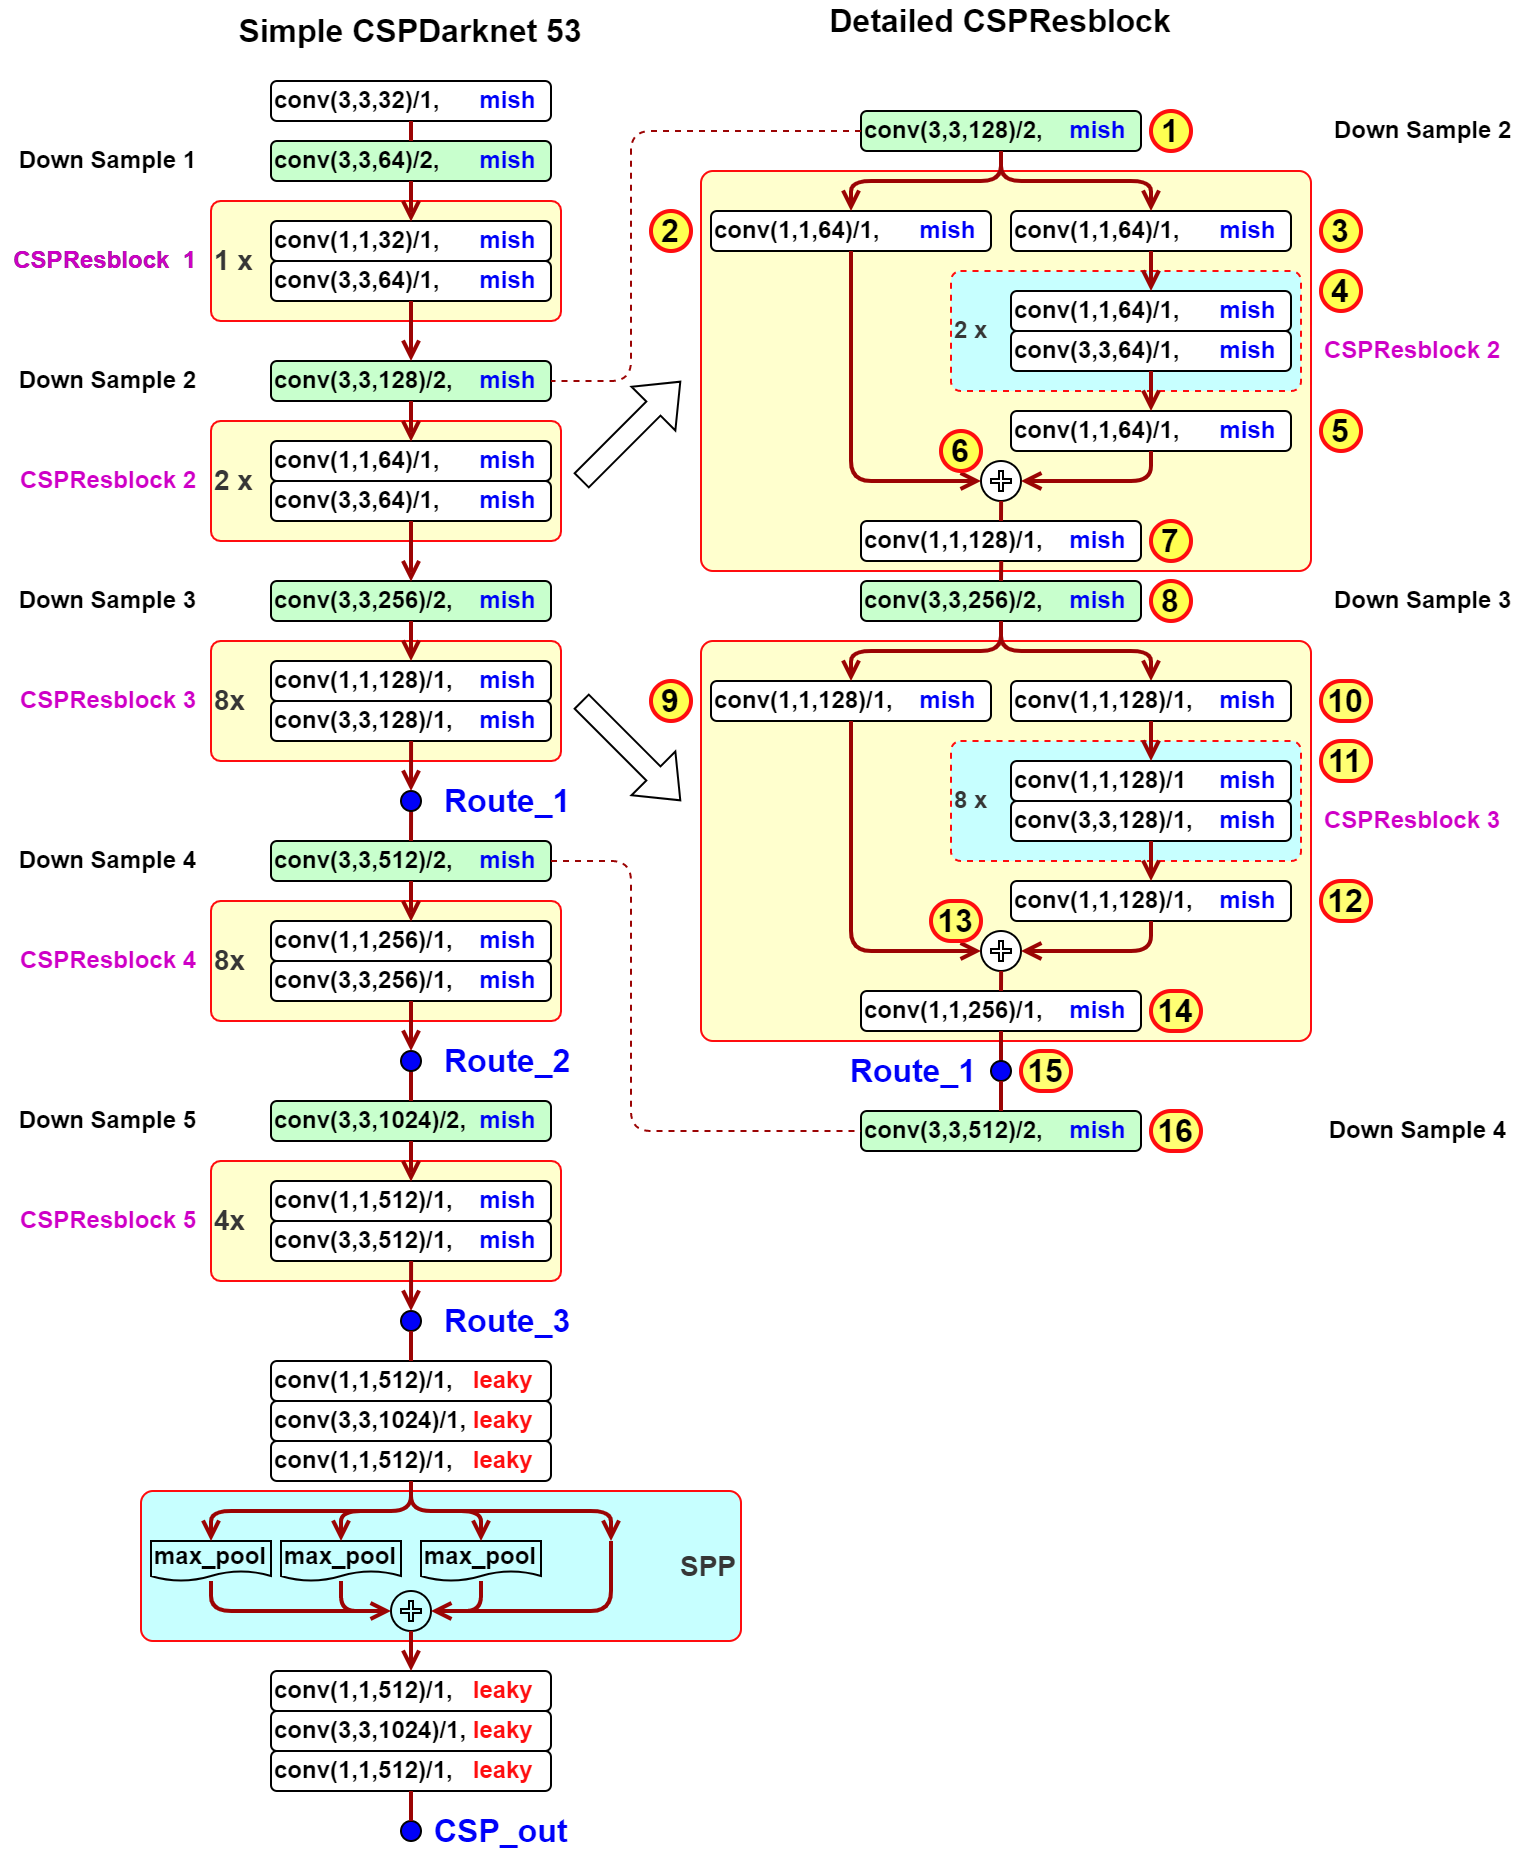



**Reference: [35. Implementation TF2 Yolo V4 ](https://wikidocs.net/176268)**

### **Data Augumentation**

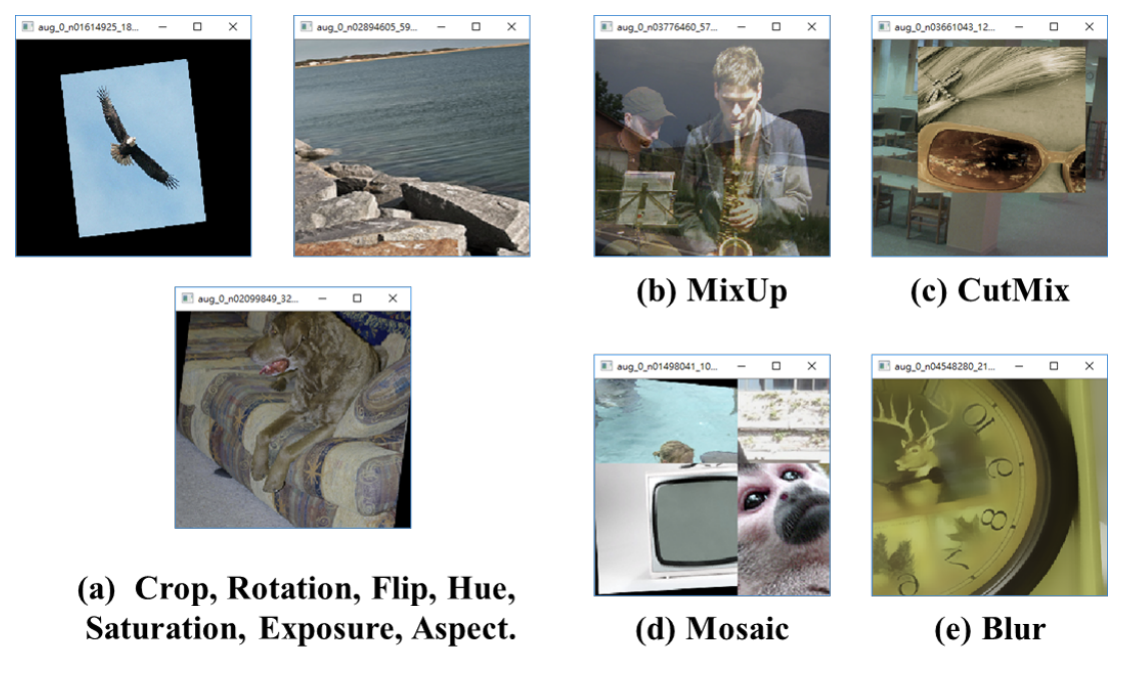

# **Environment Checking**

Please make sure your runtime type is ***GPU*** or ***TPU***

Check GPU by using the following command:

In [ ]:
!nvidia-smi

Thu Apr 13 07:11:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Optional**: Mount google drive for use the custom data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Setup YOLOv4**

This section is used to setup YOLOv4 and its environment.

## **Download Project**

We use [WongKinYiu/PyTorch_YOLOv4](https://github.com/WongKinYiu/PyTorch_YOLOv4), which is a pytorch version of YOLOv4 developed by one of the authors, Dr.Chien-Yao Wang. He is also an assistant researcher at the Institute of Information Science, Academia Sinica.

Use `git clone` command for download project from github.

In [ ]:
!git clone https://github.com/ws6125/yolov4_pytorch.git

Cloning into 'yolov4_pytorch'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 401 (delta 4), reused 0 (delta 0), pack-reused 388
Receiving objects: 100% (401/401), 1.17 MiB | 8.54 MiB/s, done.
Resolving deltas: 100% (203/203), done.


## **Install required packages**

In [ ]:
%cd yolov4_pytorch
%pip install -r requirements.txt

/content/yolov4_pytorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Dataset**

## **Labeling**

Label tools:
* [CVAT](https://www.cvat.ai/)
* [labelImg](https://github.com/heartexlabs/labelImg)
* [labelme](https://github.com/wkentaro/labelme)
* [VoTT](https://github.com/microsoft/VoTT)
* [imglab](https://github.com/NaturalIntelligence/imglab)



### **How to labeling**

**[Google Slide](https://docs.google.com/presentation/d/1whgVFSZ17vJUldnn9oVfW4t0Kp5wlCaLJTmjPlwFpKk)**

## ***Optional: Copy Dataset***

Copy dataset to **datasets** folder

In [ ]:
!cp -r /content/drive/MyDrive/Yolo\ data/Little\ animal/images /content/yolov4_pytorch/data/

In [ ]:
!cp -r /content/drive/MyDrive/Yolo\ data/Little\ animal/labels /content/yolov4_pytorch/data/

In [ ]:
!cp -r /content/drive/MyDrive/Yolo\ data/Little\ animal/obj.names /content/yolov4_pytorch/data/

In [ ]:
!cd /content/yolov4_pytorch/data

## **Add Yaml File**

Add a yaml file for the custom dataset

In [ ]:
!echo -e 'path: /content/yolov4_pytorch/data  # dataset root dir\ntrain: /content/yolov4_pytorch/data/images\nval: /content/yolov4_pytorch/data/images\n\nnc: 3\nnames: [Wolf cub,Puppy,Kitten]' > data/dogcat.yaml
!head data/dogcat.yaml

path: /content/yolov4_pytorch/data  # dataset root dir
train: /content/yolov4_pytorch/data/images
val: /content/yolov4_pytorch/data/images

nc: 3
names: [Wolf cub,Puppy,Kitten]


## **Modify Config**

Modify all **filters** and **classes** of config file

**filters** should be <u>**(classes + 5) x 3**</u>
* **5**: <u>w, h, x, y, confidence</u>
* **3**: dectects 3 boxes per grid cell


In this example, we have 2 classes: *dog* and *cat*

filters = (2 + 5) * 3 = 21

In [ ]:
(3 + 5) * 3

24

In [ ]:
!cp /content/yolov4_pytorch/cfg/yolov4.cfg /content/yolov4_pytorch/cfg/dogcat.cfg
!sed -n -e 961p -e 968p -e 1048p -e 1055p -e 1135p -e 1142p /content/yolov4_pytorch/cfg/dogcat.cfg

filters=255
classes=80
filters=255
classes=80
filters=255
classes=80


In [ ]:
!sed -i '961s/255/24/' /content/yolov4_pytorch/cfg/dogcat.cfg  # 255 -> 21
!sed -i '968s/80/3/' /content/yolov4_pytorch/cfg/dogcat.cfg  # 80 -> 2
!sed -i '1048s/255/24/' /content/yolov4_pytorch/cfg/dogcat.cfg  # 255 -> 21
!sed -i '1055s/80/3/' /content/yolov4_pytorch/cfg/dogcat.cfg  # 80 -> 2
!sed -i '1135s/255/24/' /content/yolov4_pytorch/cfg/dogcat.cfg  # 255 -> 21
!sed -i '1142s/80/3/' /content/yolov4_pytorch/cfg/dogcat.cfg  # 80 -> 2

!sed -n -e 961p -e 968p -e 1048p -e 1055p -e 1135p -e 1142p /content/yolov4_pytorch/cfg/dogcat.cfg

filters=24
classes=3
filters=24
classes=3
filters=24
classes=3


# **Use YOLOv4**

The following steps will show you how to use YOLOv4:
1. Training
2. Validation
3. Inference
4. Visualize



## **Training**

Train a YOLOv4 model on the custom dataset.

You can also set `--weights` parameter to use a pre-train model.

In [ ]:
!rm -rf runs/train
!python train.py --batch-size 8 --img 416 416 --data data/dogcat.yaml --cfg cfg/dogcat.cfg --weights '' --epoch 200

2023-04-13 08:15:54.133741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 08:15:55.413259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101MB)

Namespace(weights='', cfg='cfg/dogcat.cfg', data='data/dogcat.yaml', hyp='data/hyp.scratch.yaml', epochs=200, batch_size=8, img_size=[416, 416], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, log_imgs=16, workers=8, project='runs/train', name='exp', exist_ok=False, total_batch_size=8, world_size=1, global_rank=-1, save_dir='run

## **Validation**

Validate the model by using validation set.

You should change the `--weight` parameter to your own model.

In [ ]:
!rm -rf runs/test
# !python test.py --batch-size 4 --img-size 416 --data data/dogcat.yaml --cfg cfg/dogcat.cfg --weights runs/train/exp/weights/best.pt --names data/dogcat/dogcat.names
!python test.py --batch-size 4 --img-size 416 --data data/dogcat.yaml --cfg cfg/dogcat.cfg --weights runs/train/exp/weights/best.pt --names /content/yolov4_pytorch/data/obj.names

Namespace(weights=['runs/train/exp/weights/best.pt'], data='data/dogcat.yaml', batch_size=4, img_size=416, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, cfg='cfg/dogcat.cfg', names='/content/yolov4_pytorch/data/obj.names')
Using torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101MB)

Model Summary: 488 layers, 63948456 parameters, 63948456 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Scanning labels /content/yolov4_pytorch/data/labels.cache3 (34 found, 0 missing, 0 empty, 0 duplicate, for 34 images): 34it [00:00, 14874.97it/s]
               Class      Images     Target

## **Inference**

Inference images by using YOLOv3 model.

You should change the `--weight` parameter to your own model.

`--source` provides image, video, and directory. ([ref](https://colab.research.google.com/github/ultralytics/yolov3/blob/master/tutorial.ipynb#scrollTo=4JnkELT0cIJg))

In [ ]:
# !python detect.py --weights runs/train/exp/weights/best.pt --cfg cfg/dogcat.cfg --names /content/yolov4_pytorch/data/obj.names --source data/dogcat/sample_dogcat/
!python detect.py --weights runs/train/exp/weights/last.pt --cfg cfg/dogcat.cfg --names /content/yolov4_pytorch/data/obj.names --source /content/yolov4_pytorch/data/images/dog-1851107_1280.jpg

Namespace(weights=['runs/train/exp/weights/last.pt'], source='/content/yolov4_pytorch/data/images/dog-1851107_1280.jpg', output='inference/output', img_size=640, conf_thres=0.4, iou_thres=0.5, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False, update=False, cfg='cfg/dogcat.cfg', names='/content/yolov4_pytorch/data/obj.names')
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/1 /content/yolov4_pytorch/data/images/dog-1851107_1280.jpg: 448x640 Done. (0.141s)
Results saved to inference/output
Done. (1.643s)


## **Visualize**

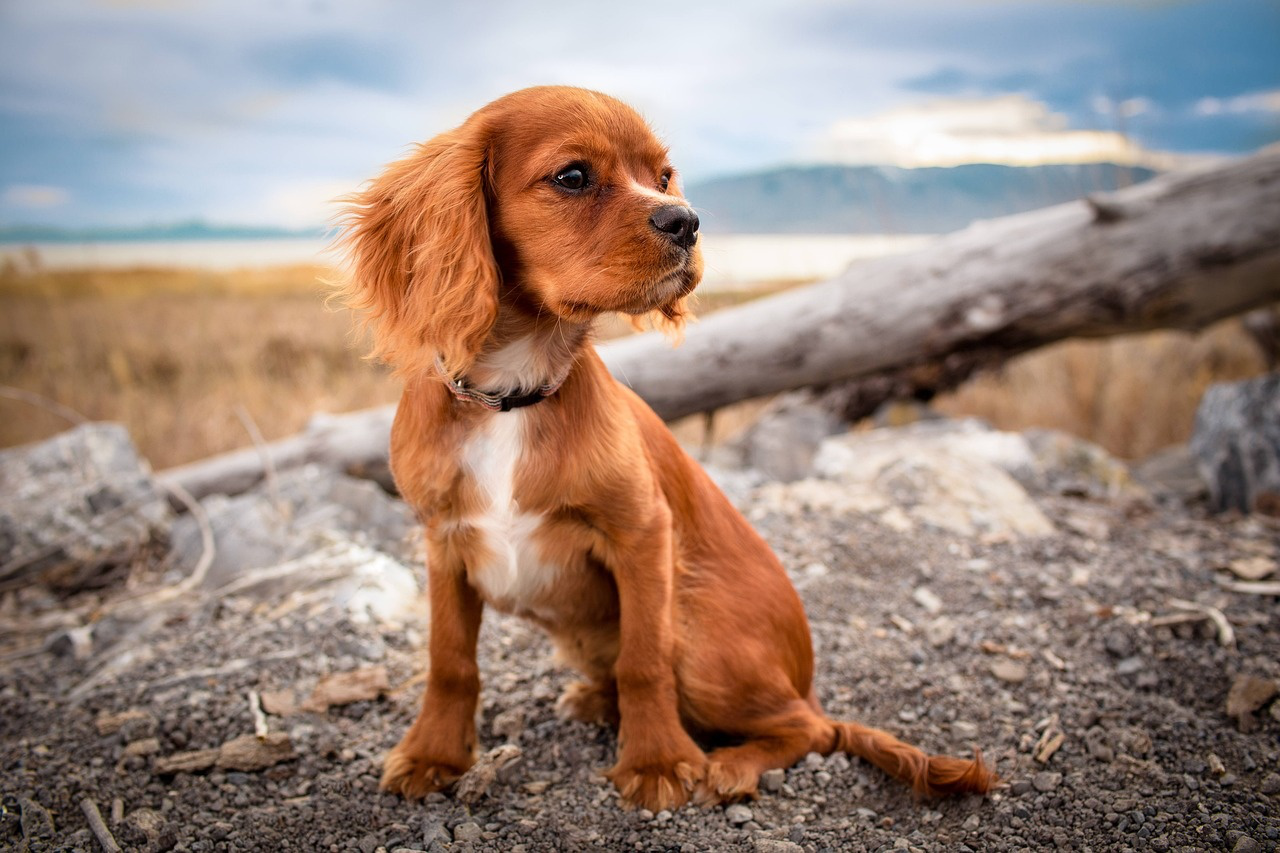

In [ ]:
# import cv2
# from matplotlib import pyplot as plt

# img = cv2.imread('runs/detect/exp/0000000_00098_d_0000001.jpg', cv2.IMREAD_COLOR)
# # cv2.imshow('color image', img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

from PIL import Image
img = Image.open('/content/yolov4_pytorch/inference/output/dog-1851107_1280.jpg')
display(img)

error: ignored

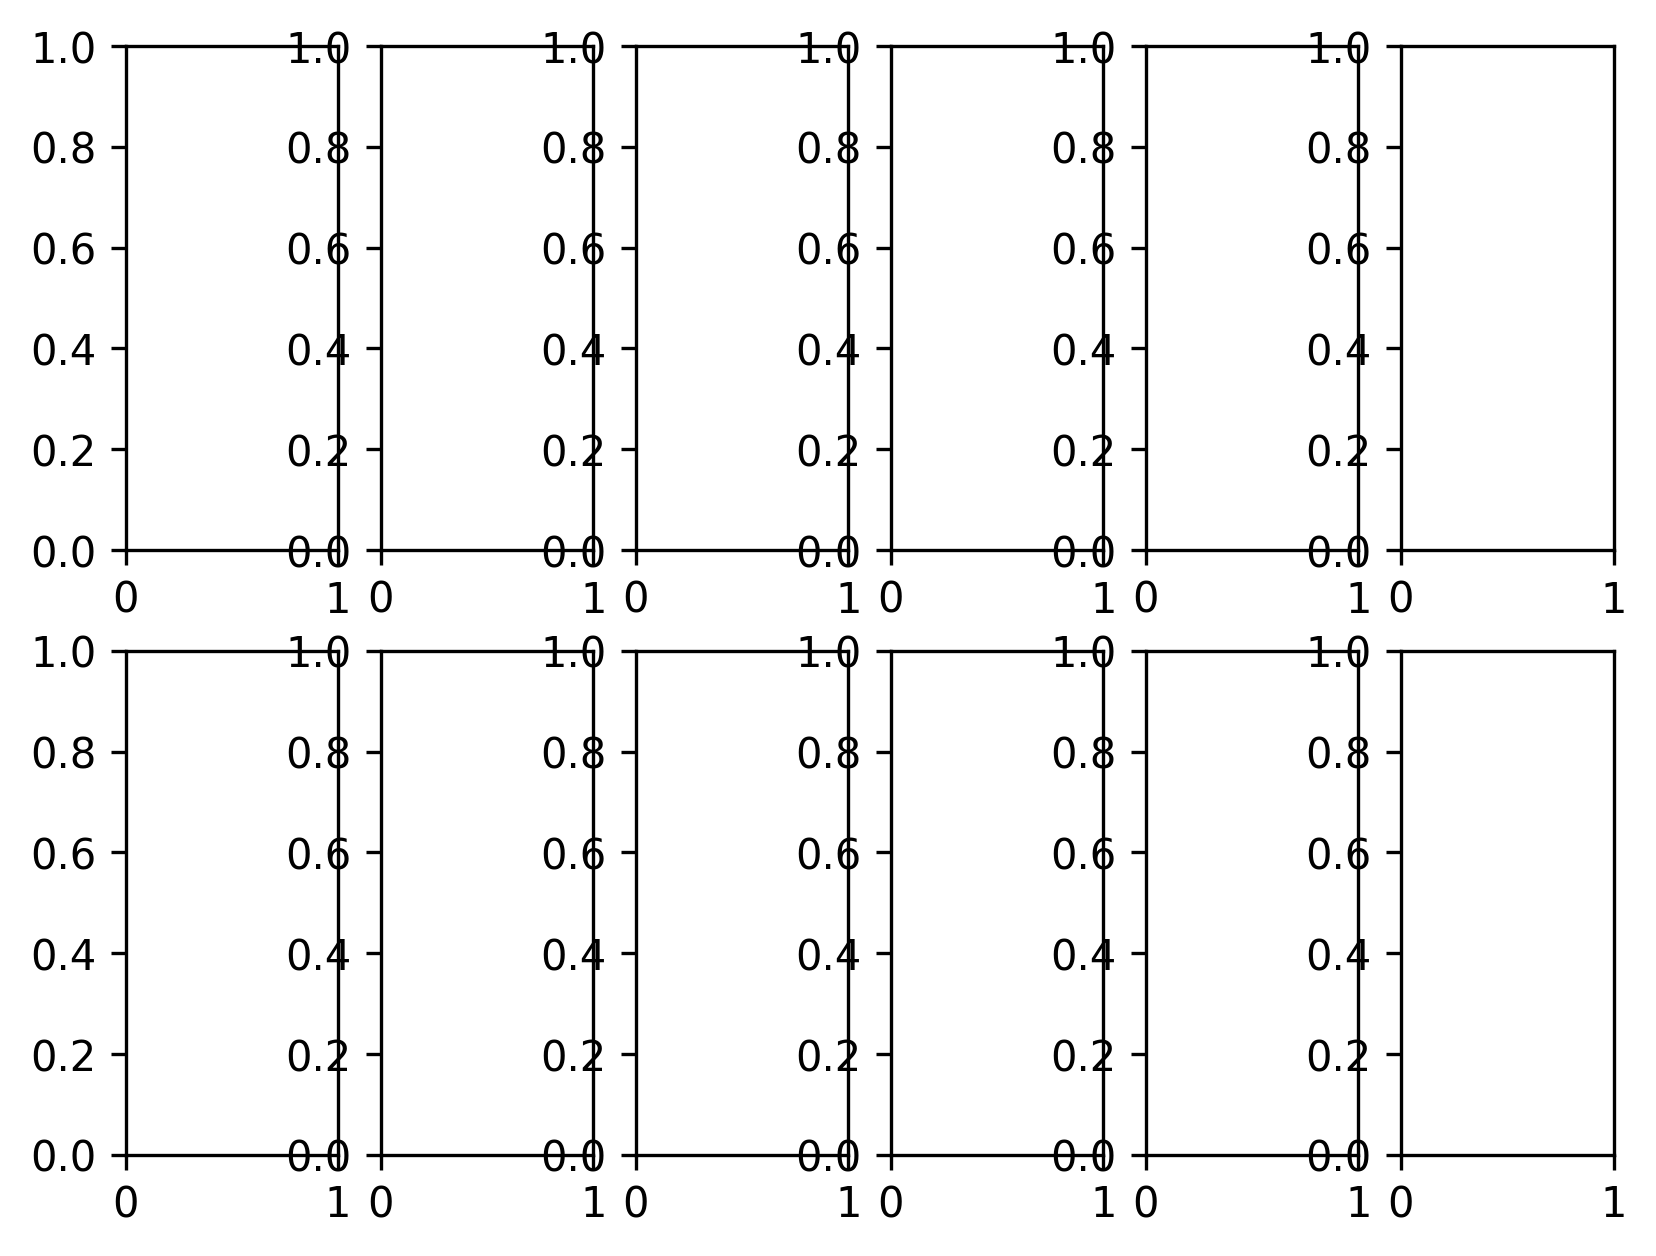

In [ ]:
import cv2
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 6)  # plot 2 x 6 images
fig.set_dpi(300)
base_path = 'inference/output'

for i in range(6):  # 0 - 5
    idx = str(i + 1)  # 1 - 6
    
    cat = cv2.imread(f'{base_path}/cat_{idx}.jpg', cv2.IMREAD_COLOR)  # read a cat image
    dog = cv2.imread(f'{base_path}/dog_{idx}.jpg', cv2.IMREAD_COLOR)  # read a dog image
    
    ax[0][i].imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))  # set the cat image to row 0
    ax[1][i].imshow(cv2.cvtColor(dog, cv2.COLOR_BGR2RGB))  # set the dog image to row 1
    
    ax[0][i].axis('off')  # set axis off
    ax[1][i].axis('off')  # set axis off

## ***Optional: Save Model***

Save your model to drive

In [ ]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/best.pt

# **Report**

## **Do it yourself**

Please use YOLOv4 and your own data to train your own object detection model.


## **Report**

### **Deadline**

**2023/05/26**

### **Report Format**

**{Student1ID}\_{Student2ID}\_{Student3ID}.zip** contents:
* a report doc
* (if possible) inference result images